# Logistic Regression with Python

I will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

I be trying to predict a classification- survival or deceased.

**Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Getting Data**

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Visualizing Data to know the missing values.

**Missing Data**

We can use seaborn to create a simple heatmap to see where we are missing data.

<AxesSubplot:>

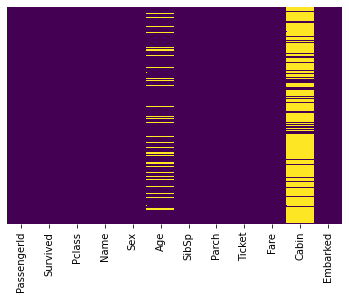

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

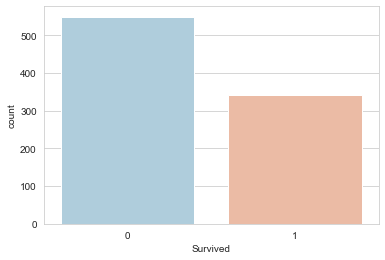

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

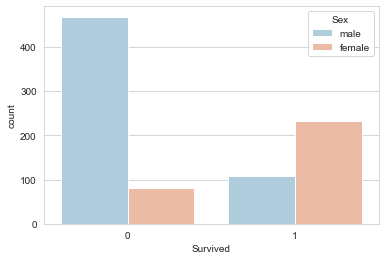

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

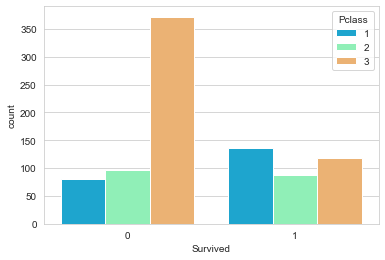

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

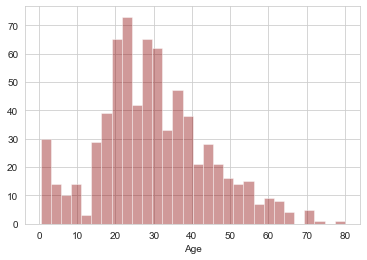

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

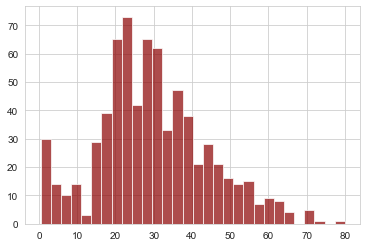

In [12]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

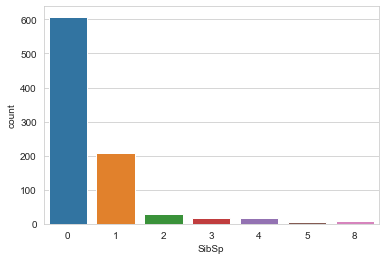

In [13]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

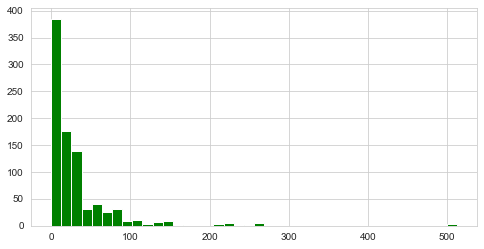

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

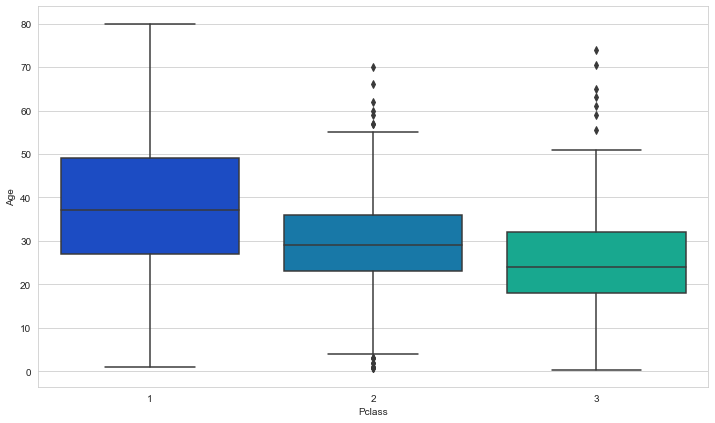

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

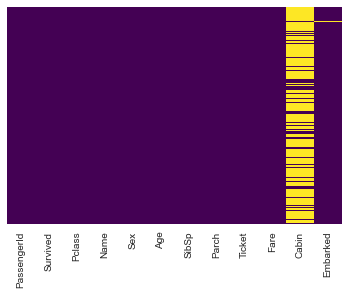

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas for our machine learning algorithm.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train = pd.concat([train,sex,embark],axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Data is now ready for Machine Learning Algorithms

# Logistic Regression model

Let's start by splitting our data into a training set and test set.

**Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

**Training and Predicting**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.775,0,0,1
651,2,18.0,0,1,23.000,0,0,1
2,3,26.0,0,0,7.925,0,0,1
690,1,31.0,1,0,57.000,1,0,1
196,3,24.0,0,0,7.750,1,1,0


**Evaluation**

We can check precision,recall,f1-score using classification report!

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## K neighbor classifier

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
new_df1 = train
new_df = train.drop('Survived',axis=1)
new_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [40]:
scaler.fit(new_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scaled_features = scaler.transform(new_df)

In [42]:
df_feat = pd.DataFrame(scaled_features,columns=new_df.columns)
df_feat.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,-1.732505,0.825209,-0.531670,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.728611,-1.572211,0.680232,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,-1.724718,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.720825,-1.572211,0.453001,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,-1.716931,0.825209,0.453001,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_features,new_df1['Survived'],
                                                    test_size=0.30)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
pred1 = knn.predict(X_test1)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(y_test1,pred1))

[[128  32]
 [ 29  78]]


In [50]:
print(classification_report(y_test1,pred1))

             precision    recall  f1-score   support

          0       0.82      0.80      0.81       160
          1       0.71      0.73      0.72       107

avg / total       0.77      0.77      0.77       267



In [51]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i = knn.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test1))

Text(0, 0.5, 'Error Rate')

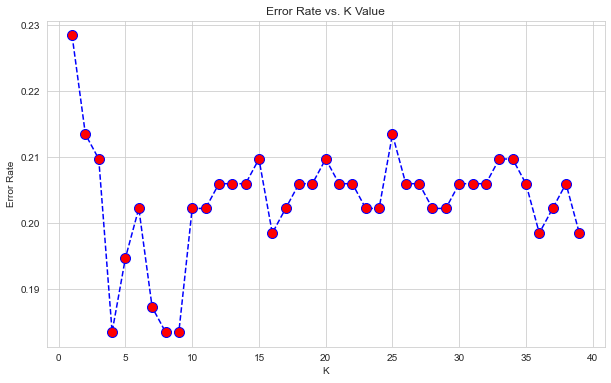

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Decision Tree

In [53]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.775,0,0,1
651,2,18.0,0,1,23.000,0,0,1
2,3,26.0,0,0,7.925,0,0,1
690,1,31.0,1,0,57.000,1,0,1
196,3,24.0,0,0,7.750,1,1,0


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtree = DecisionTreeClassifier()

In [56]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
predictions_DT = dtree.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,predictions_DT))

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       163
          1       0.73      0.70      0.72       104

avg / total       0.78      0.78      0.78       267



In [60]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
rfc_pred = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test,rfc_pred))

[[143  20]
 [ 28  76]]


In [64]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       163
          1       0.79      0.73      0.76       104

avg / total       0.82      0.82      0.82       267



## SVM

In [65]:
from sklearn.svm import SVC

In [66]:
model = SVC()

In [71]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
predictions_SVC = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(confusion_matrix(y_test,predictions_SVC))

[[132  31]
 [ 54  50]]


In [75]:
print(classification_report(y_test,predictions_SVC))

             precision    recall  f1-score   support

          0       0.71      0.81      0.76       163
          1       0.62      0.48      0.54       104

avg / total       0.67      0.68      0.67       267



In [76]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [85]:

grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6213592233009708, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6213592233009708, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6310679611650486, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6634615384615384, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6634615384615384, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf

[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6442307692307693, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6586538461538461, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.7330097087378641, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.6971153846153846, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7211538461538461, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.8106796116504854, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ...... C=1000, gamma=0.001, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [86]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [87]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
grid_predictions = grid.predict(X_test)

In [89]:
print(confusion_matrix(y_test,grid_predictions))

[[144  19]
 [ 30  74]]


In [90]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       163
          1       0.80      0.71      0.75       104

avg / total       0.82      0.82      0.81       267

